<a href="https://colab.research.google.com/github/dys0602/Kaggle_Titanic/blob/main/Kaggle_Titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Feature Engineering

#### Feature Engineering이란 데이터를 분석한 내용과 도메인 지식을 바탕으로 feature vector(컴퓨터가 알 수 있는 수)로 만들어 주는 작업이다. 이 작업이 필요한 이유는 machine learning 을 통해 학습을 시켜서 알고리듬을 만들기 위해서 필요하다.

-> 즉, 머신러닝을 통해 알고리즘을 만들기 위해서 꼭 필요한 과정.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from matplotlib import rc
import missingno as msno

# 노트북 안에 그래프를 그리기 위해 셋팅
%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams["axes.unicode_minus"] = False

데이터 다운로드 : https://www.kaggle.com/c/titanic/data

In [ ]:
# data load

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 2번째 column : Name의 Feature Engineering
# train, test 모두 순회해야 하므로 리스트로 묶기

train_test_data = [train, test]

In [ ]:
train['Name'] # 이 중 Mr / Miss 성별 정보 가져오기

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand = False) # 모든 알파벳 + .으로 끝나는 것, expand = False : series 데이터로(True면 dataframe으로)

In [ ]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Don           1
Countess      1
Mme           1
Lady          1
Jonkheer      1
Ms            1
Capt          1
Name: Title, dtype: int64

In [ ]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [ ]:
# 불필요한 column 제거
test.drop('Name', axis=1, inplace=True) # axis=1 : 칼럼 지우기, inplace=True : 출력하지 않고 데이터 저장만
train.drop('Name', axis=1, inplace=True)

In [ ]:
train.head(1) # column 제거됐는지 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [ ]:
# 1. 이름(Name) 컬럼 Feature Engineering : 남자-0, 미혼여자-1, 기혼여자-2, 그외-3
title_mapping = { "Mr" : 0, "Miss" : 1, "Mrs" : 2,
                  "Master" : 0, "Dr" : 3, "Rev" : 3, "Col" : 3, "Major" : 3, "Mile" : 3, "Countess" : 3,
                  "Ms" : 2, "Lady" : 2, "Jonkheer" : 1, "Don" : 3, "Dona" : 3, "Mme": 3, "Capt": 3, "Sir" : 0 }

In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'].astype(int)

In [ ]:
train.head(2) # mapping 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0


In [ ]:
# 2. 성별(Sex) 컬럼 Feature Engineering
sex_mapping = { "male" : 0, "female" : 1}

for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [ ]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.25,NaN,S,0.0


In [ ]:
# 3. 나이(Age) 컬럼 Feature Engineering

# null 값 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
# 같은 Title을 그룹으로 하여 중간값 대입
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
# 잘 적용됐는지 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
train["Age"] # 값의 차이가 크므로 binding(똑같은 간격으로 맞춰주기) 필요

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
train["AgeBand"] = pd.cut(train['Age'], 5) # 5개로 구간 자르기
train[["AgeBand", "Survived"]].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True) # AgeBand 그룹화하고 정렬, as_index=False : 인덱스로는 사용 X

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.328713
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [ ]:
# 위 표를 토대로 Age mapping
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
# 오류 발생

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0,"(16.336, 32.252]"
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2.0,"(32.252, 48.168]"
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,"(16.336, 32.252]"


In [ ]:
# 4.embark 컬럼 Feature Engineering

train.isnull().sum() # 2개

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
AgeBand          0
dtype: int64

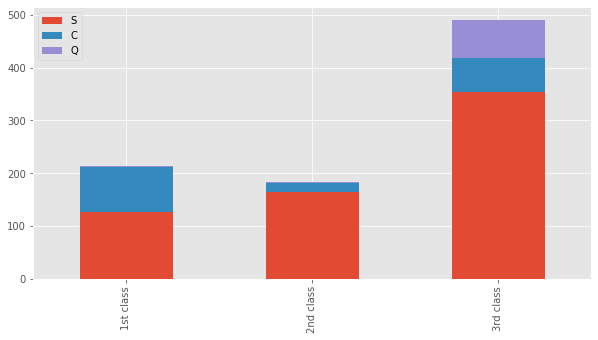

In [ ]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S') # S가 가장 많으므로 결측값을 S로 

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [ ]:
embarked_mapping = {
    'S':0,
    'Q':1,
    'C':2
}

In [ ]:
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0,"(16.336, 32.252]"
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,2,2.0,"(32.252, 48.168]"


In [ ]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,1,0
1,893,3,1,2.0,1,0,363272,7.0000,NaN,0,2


In [ ]:
# 5. 요금(Fare) 컬럼 Feature Engineering
# 5-1. 테스트 데이터의 결측값 채워주기 - 같은 Pclass들의 중간값으로 채움
test["Fare"].fillna(test.groupby("Pclass")['Fare'].transform("median"), inplace=True)

test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [ ]:
train['FareBand'] = pd.cut(train['Fare'], 5) # 5개의 구간으로 잘라라
train[["FareBand", "Survived"]].groupby("FareBand", as_index=False).mean().sort_values(by="FareBand", ascending=True)

,FareBand,Survived
0,"(-0.512, 102.466]",0.361575
1,"(102.466, 204.932]",0.757576
2,"(204.932, 307.398]",0.647059
3,"(307.398, 409.863]",NaN
4,"(409.863, 512.329]",1.000000


In [ ]:
# 구간에 따라 정수 매핑
for dataset in train_test_data:
  dataset.loc[dataset['Fare'] <= 102, 'Fare'] = 0
  dataset.loc[ (dataset['Fare'] > 102) & (dataset['Fare'] <= 204), 'Fare'] = 1
  dataset.loc[ (dataset['Fare'] > 204) & (dataset['Fare'] <= 307), 'Fare'] = 2
  dataset.loc[dataset['Fare'] > 307, 'Fare'] = 3

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0,"(16.336, 32.252]","(-0.512, 102.466]"
1,2,1,1,1,2.0,1,0,PC 17599,0.0,C85,2,2.0,"(32.252, 48.168]","(-0.512, 102.466]"


In [ ]:
# 필요없는 컬럼 제거
train.drop('AgeBand', axis=1, inplace=True)
train.drop('FareBand', axis=1, inplace=True)

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,2.0,1,0,PC 17599,0.0,C85,2,2.0


In [ ]:
# Cabin 데이터는 200개 넘게 결측이 있어 추측이 어려우므로 제거
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [ ]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,0.0


In [ ]:
# Ticket 번호로 생존여부를 알 수 없으므로 삭제
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [ ]:
train.head(1) # 모두 숫자로 변환 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,0,0.0


In [ ]:
test.head(1) # 모두 숫자로 변환 확인

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2.0,0,0,0.0,1,0


In [ ]:
# Family(Sibsp + Parch) binding 작업
train["FamilySize"] = train['SibSp'] + train['Parch'] + 1 # 1은 자기 자신
test["FamilySize"] = test['SibSp'] + test['Parch'] + 1 # 1은 자기 자신

train[['FamilySize','Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


(0.0, 11.0)

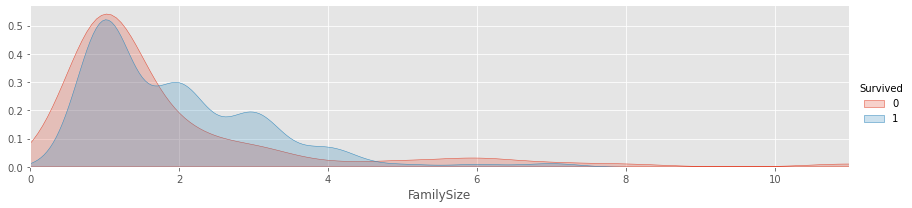

In [ ]:
# 시각화하여 FamilySize 별로 의미있는지 확인
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)
# 그래프가 다름

In [ ]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,0,0.0,2


In [ ]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,0.0,1,0,1


In [ ]:
# 학습하기 위해 PassengerId, Survived 데이터 삭제
dropped_data = ['Survived', 'PassengerId']

In [ ]:
train_data = train.drop(dropped_data, axis=1)

## 2. Modeling

In [ ]:
# importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### cross-validation (k-fold)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
target = train['Survived']

#k-fold
clf = KNeighborsClassifier(n_neighbors=11) # 11개의 가까운 데이터의 결괏값으로 추측
scoring = "accuracy"

score = cross_val_score(clf, train_data, target, cv=k_fold , n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2)) # 78% 정확성

[0.78888889 0.74157303 0.79775281 0.76404494 0.83146067 0.78651685
 0.7752809  0.76404494 0.80898876 0.79775281]
78.56


In [ ]:
# decision tree
clf = DecisionTreeClassifier()
scoring = "accuracy"

score = cross_val_score(clf, train_data, target, cv=k_fold , n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2)) # 80% 정확성

[0.82222222 0.80898876 0.82022472 0.80898876 0.83146067 0.80898876
 0.78651685 0.82022472 0.76404494 0.78651685]
80.58


In [ ]:
# Naive Bayes
clf = GaussianNB()
scoring = "accuracy"

score = cross_val_score(clf, train_data, target, cv=k_fold , n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2)) # 78% 정확성

[0.76666667 0.76404494 0.7752809  0.75280899 0.78651685 0.7752809
 0.7752809  0.79775281 0.82022472 0.79775281]
78.12


In [ ]:
# SVM
clf = SVC()
scoring = "accuracy"

score = cross_val_score(clf, train_data, target, cv=k_fold , n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2)) # 81% 정확성

[0.82222222 0.78651685 0.78651685 0.82022472 0.84269663 0.80898876
 0.79775281 0.79775281 0.80898876 0.84269663]
81.14


In [ ]:
# randomfroset
clf = RandomForestClassifier()
scoring = "accuracy"

score = cross_val_score(clf, train_data, target, cv=k_fold , n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2)) # 80% 정확성

[0.81111111 0.80898876 0.79775281 0.82022472 0.82022472 0.78651685
 0.82022472 0.80898876 0.7752809  0.80898876]
80.58


## 3. Testing
#### 가장 높은 정확성을 가지는 **SVM**으로 캐글 제출

In [ ]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [ ]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
})

submission.to_csv("submission.csv", index=False)